Файл питон собран по логике отчета 


Подгрузка библиотек и дата сета

In [14]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import warnings
warnings.simplefilter('ignore')
import scipy as sp
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [40]:
df = pd.read_csv('online.csv')
sales_data = pd.read_csv('online.csv')

Техническое описание датасета и поиск пропущенных значений

In [5]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
len(sales_data['OperatingSystems'].unique())


8

In [9]:
len(sales_data['Browser'].unique())


13

In [10]:
len(sales_data['Region'].unique())


9

In [11]:
len(sales_data['TrafficType'].unique())

20

Описание поведения потребителей

In [15]:
visitor_type = sales_data.groupby('VisitorType')
new = visitor_type.get_group('New_Visitor')
returning = visitor_type.get_group('Returning_Visitor')
new_1 = new.groupby('Revenue')
new_true = new_1.get_group(True)
new_false = new_1.get_group(False)
old_1 = returning.groupby('Revenue')
old_true = old_1.get_group(True)
old_false = old_1.get_group(False)

In [18]:
print(sales_data.OperatingSystems.value_counts())

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64


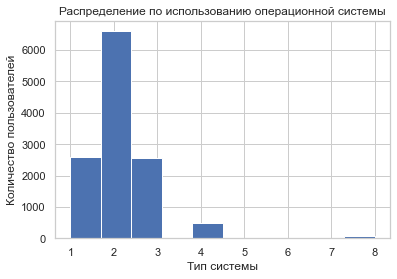

In [16]:
plt.hist(sales_data['OperatingSystems'])
plt.title('Распределение по использованию операционной системы')
plt.xlabel('Тип системы')
plt.ylabel('Количество пользователей')
plt.show()

In [19]:
print(sales_data.Browser.value_counts())

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64


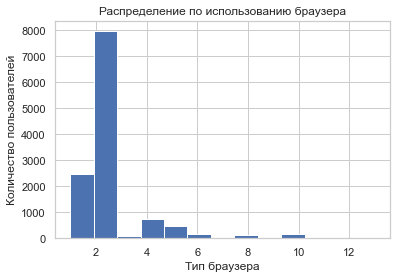

<Figure size 720x216 with 0 Axes>

In [20]:
plt.hist(sales_data['Browser'], bins=13)
plt.title('Распределение по использованию браузера')
plt.xlabel('Тип браузера')
plt.ylabel('Количество пользователей')
plt.figure(figsize=(10,3))
plt.show()

In [21]:
print(sales_data.Region.value_counts())

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64


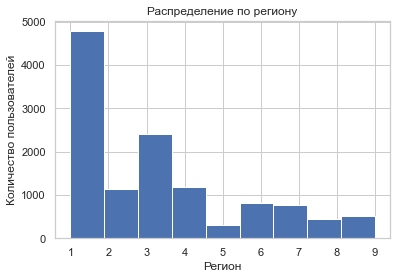

<Figure size 720x216 with 0 Axes>

In [22]:
plt.hist(sales_data['Region'], bins=9)
plt.title('Распределение по региону')
plt.xlabel('Регион')
plt.ylabel('Количество пользователей')
plt.figure(figsize=(10,3))
plt.show() 

In [23]:
print(sales_data.TrafficType.value_counts())

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64


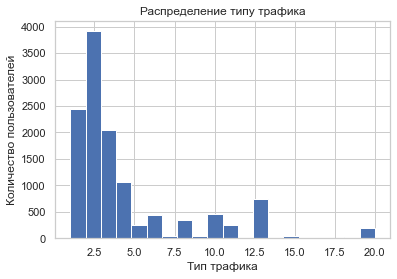

<Figure size 1440x1440 with 0 Axes>

In [24]:
plt.hist(sales_data['TrafficType'], bins=20)
plt.title('Распределение типу трафика')
plt.xlabel('Тип трафика')
plt.ylabel('Количество пользователей')
plt.figure(figsize=(20,20))
plt.show()

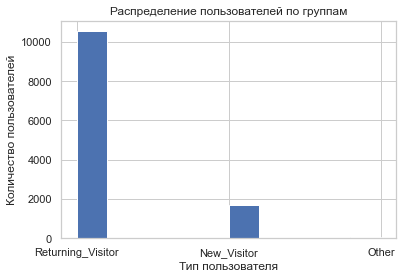

<Figure size 1440x1440 with 0 Axes>

In [25]:
plt.hist(sales_data['VisitorType'])
plt.title('Распределение пользователей по группам')
plt.xlabel('Тип пользователя')
plt.ylabel('Количество пользователей')
plt.figure(figsize=(20,20))
plt.show()

In [26]:
visitor_type['Administrative', 'Informational','ProductRelated'].mean()

,Administrative,Informational,ProductRelated
VisitorType,,,
New_Visitor,2.551948,0.333530,18.054900
Other,1.470588,0.176471,12.470588
Returning_Visitor,2.283954,0.533504,34.082457


In [27]:
visitor_type['Revenue'].mean()

VisitorType
New_Visitor          0.249115
Other                0.188235
Returning_Visitor    0.139323
Name: Revenue, dtype: float64

<AxesSubplot:>

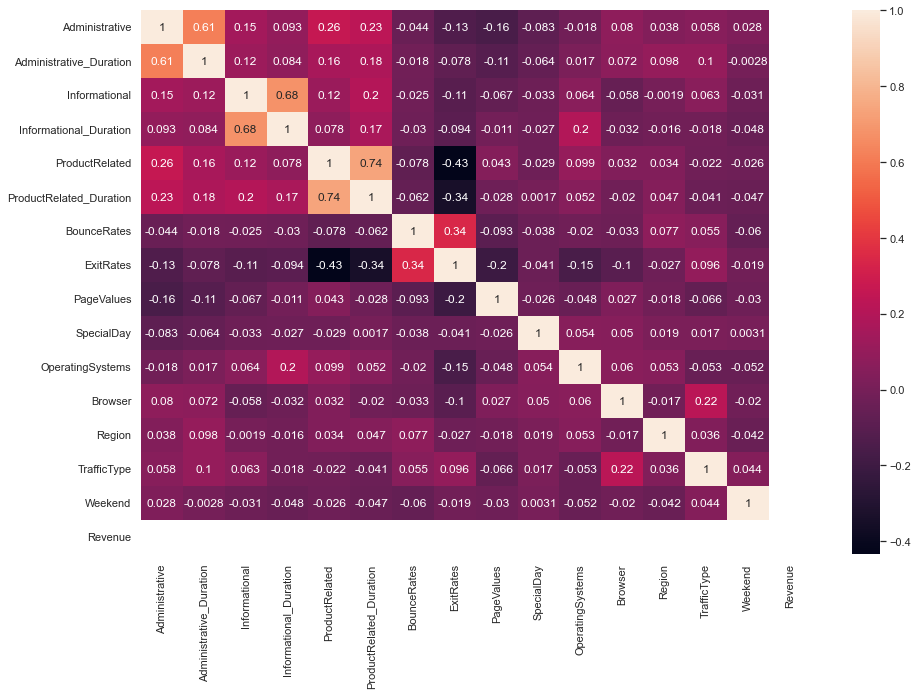

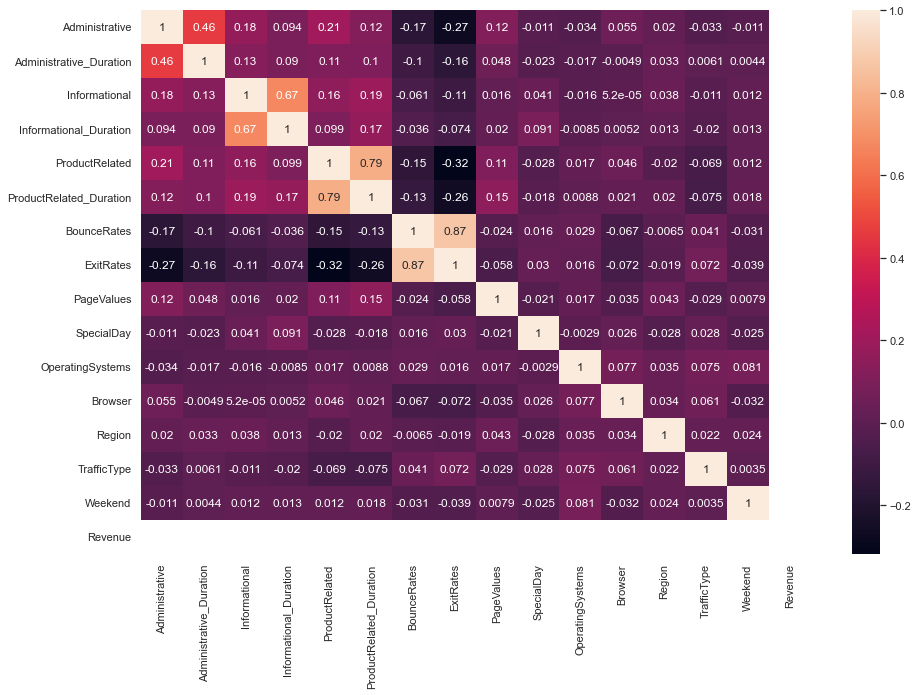

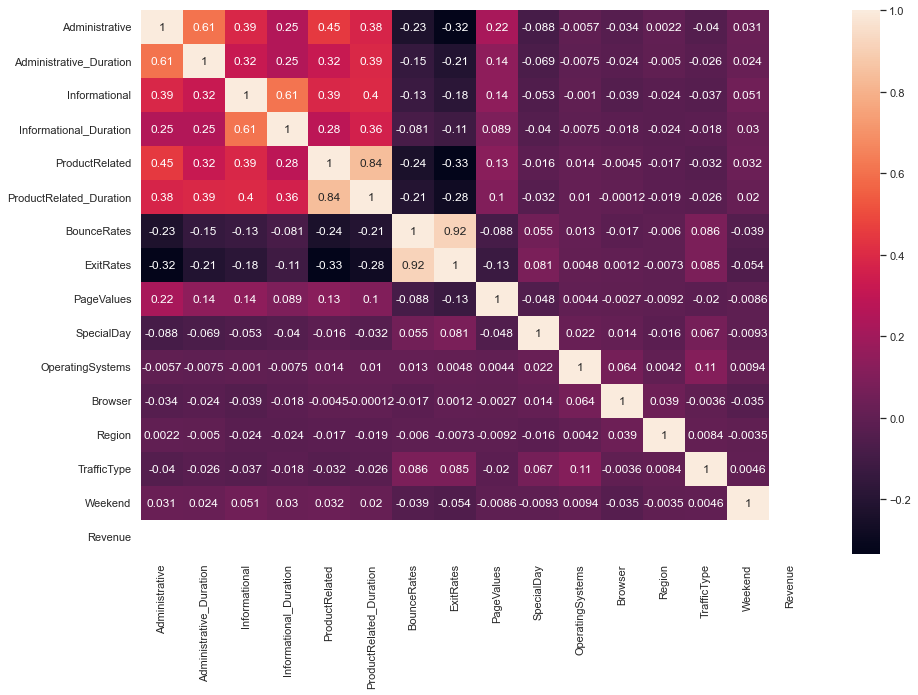

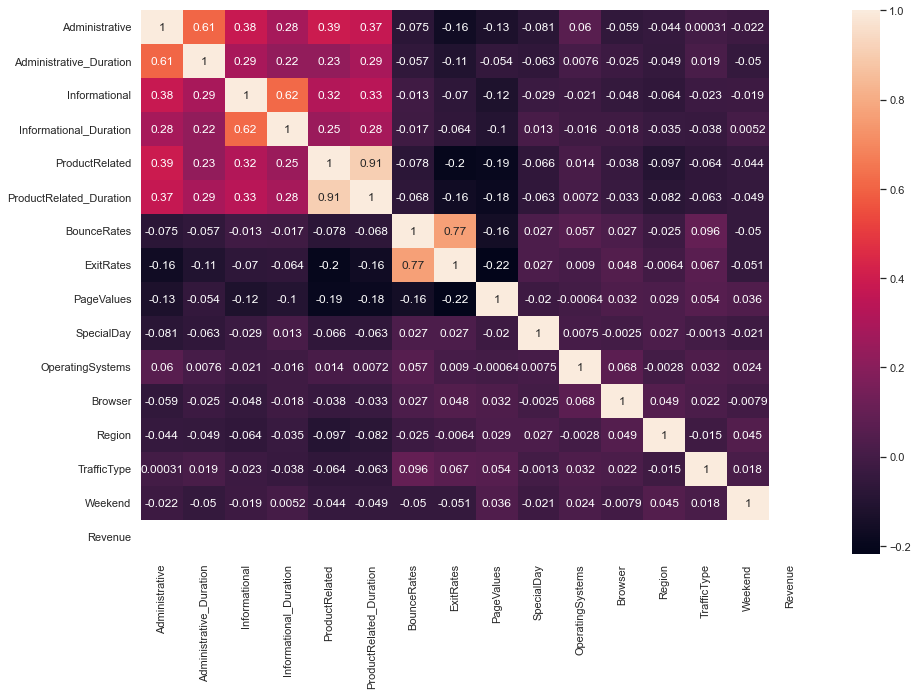

In [31]:
plt.figure(figsize=(15, 10))
sns.heatmap(data = new_true.corr(), annot=True)
plt.figure(figsize=(15, 10))
sns.heatmap(data = new_false.corr(), annot=True)
plt.figure(figsize=(15, 10))
sns.heatmap(data = old_false.corr(), annot=True)
plt.figure(figsize=(15, 10))
sns.heatmap(data = old_true.corr(), annot=True)

Анализ средних по пользоваталям, деленнным на группы новые и старые, и внутри них на совершил покупку или нет

In [32]:
old_true.mean()

Administrative                3.745578
Administrative_Duration     130.726749
Informational                 0.936735
Informational_Duration       68.818187
ProductRelated               55.909524
ProductRelated_Duration    2170.579290
BounceRates                   0.006284
ExitRates                     0.021309
PageValues                   23.174969
SpecialDay                    0.024762
OperatingSystems              2.070068
Browser                       2.368027
Region                        2.962585
TrafficType                   3.927891
Weekend                       0.267347
Revenue                       1.000000
dtype: float64

In [33]:
old_false.mean()

Administrative                2.047352
Administrative_Duration      70.840024
Informational                 0.468230
Informational_Duration       31.967887
ProductRelated               30.549169
ProductRelated_Duration    1146.782797
BounceRates                   0.027772
ExitRates                     0.050583
PageValues                    2.065076
SpecialDay                    0.075630
OperatingSystems              2.116067
Browser                       2.307125
Region                        3.119040
TrafficType                   4.042176
Weekend                       0.219029
Revenue                       0.000000
dtype: float64

In [34]:
new_false.mean()

Administrative               2.667453
Administrative_Duration     95.615285
Informational                0.350629
Informational_Duration      19.063610
ProductRelated              16.650157
ProductRelated_Duration    557.490745
BounceRates                  0.006605
ExitRates                    0.022999
PageValues                   1.367760
SpecialDay                   0.020755
OperatingSystems             2.044811
Browser                      2.253145
Region                       3.265723
TrafficType                  3.867925
Weekend                      0.294025
Revenue                      0.000000
dtype: float64

In [35]:
new_true.mean()

Administrative               2.203791
Administrative_Duration     80.746741
Informational                0.281991
Informational_Duration      19.761532
ProductRelated              22.289100
ProductRelated_Duration    874.223020
BounceRates                  0.001212
ExitRates                    0.013691
PageValues                  39.119181
SpecialDay                   0.018483
OperatingSystems             1.976303
Browser                      2.390995
Region                       3.291469
TrafficType                  3.824645
Weekend                      0.248815
Revenue                      1.000000
dtype: float64

Анализ корреляций по всему дата сету

<AxesSubplot:>

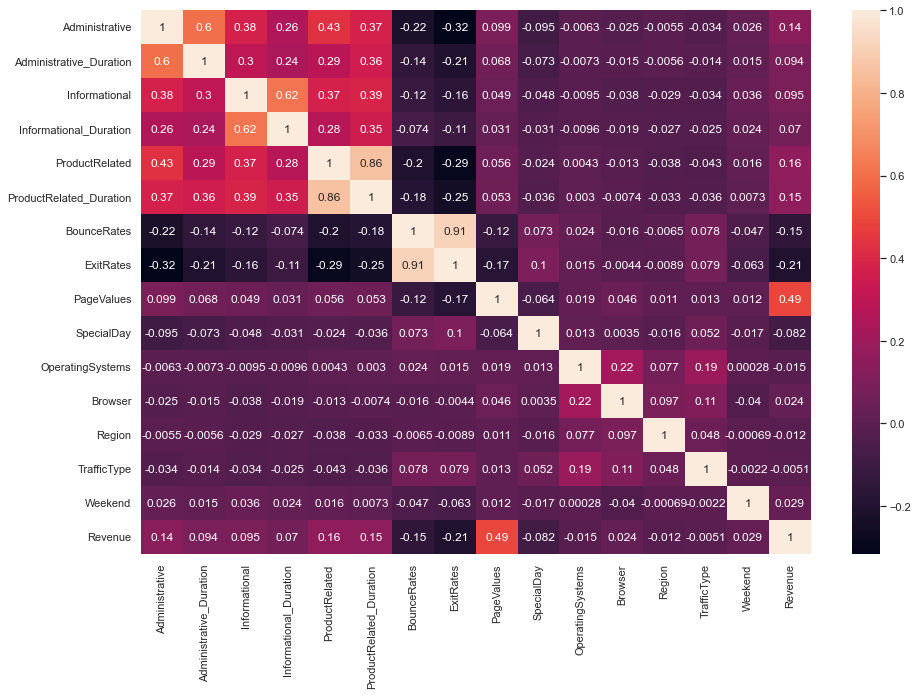

In [36]:
plt.figure(figsize=(15, 10))
sns.heatmap(data = sales_data.corr(), annot=True)

In [38]:
revenue_type = sales_data.groupby('Revenue')
revenue_type.corr()

Administrative  Administrative_Duration  \
Revenue                                                                    
False   Administrative                 1.000000                 0.593313   
        Administrative_Duration        0.593313                 1.000000   
        Informational                  0.366883                 0.299146   
        Informational_Duration         0.240288                 0.235831   
        ProductRelated                 0.425364                 0.293605   
        ProductRelated_Duration        0.354266                 0.363119   
        BounceRates                   -0.230404                -0.146925   
        ExitRates                     -0.326678                -0.210349   
        PageValues                     0.206293                 0.126789   
        SpecialDay                    -0.087772                -0.068720   
        OperatingSystems              -0.011096                -0.007148   
        Browser                       -0.024383                -0.017957   
        Region                         0.004651                 0.001470   
        TrafficType                   -0.039937                -0.021373   
        Weekend                        0.029605                 0.023998   
True    Administrative                 1.000000                 0.611557   
        Administrative_Duration        0.611557                 1.000000   
        Informational                  0.377071                 0.286933   
        Informational_Duration         0.282258                 0.223618   
        ProductRelated                 0.402279                 0.235575   
        ProductRelated_Duration        0.384304                 0.288256   
        BounceRates                   -0.040219                -0.034641   
        ExitRates                     -0.120320                -0.085423   
        PageValues                    -0.156647                -0.087388   
        SpecialDay                    -0.075787                -0.059905   
        OperatingSystems               0.026507                -0.000827   
        Browser                       -0.046420                -0.016751   
        Region                        -0.044018                -0.032186   
        TrafficType                   -0.001450                 0.020708   
        Weekend                       -0.008765                -0.039421   

                                 Informational  Informational_Duration  \
Revenue                                                                  
False   Administrative                0.366883                0.240288   
        Administrative_Duration       0.299146                0.235831   
        Informational                 1.000000                0.613259   
        Informational_Duration        0.613259                1.000000   
        ProductRelated                0.375376                0.276987   
        ProductRelated_Duration       0.386445                0.355153   
        BounceRates                  -0.119003               -0.073976   
        ExitRates                    -0.166759               -0.103935   
        PageValues                    0.125829                0.081538   
        SpecialDay                   -0.044345               -0.030937   
        OperatingSystems             -0.005573               -0.010371   
        Browser                      -0.035913               -0.018827   
        Region                       -0.018841               -0.022396   
        TrafficType                  -0.036656               -0.020351   
        Weekend                       0.044902                0.027101   
True    Administrative                0.377071                0.282258   
        Administrative_Duration       0.286933                0.223618   
        Informational                 1.000000                0.627955   
        Informational_Duration        0.627955                1.000000   
        ProductRelated                0.337087

Переход к подробному анализу каждого параметра 

In [41]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df, random_state=777, shuffle=True, stratify=df.Revenue)

In [42]:
df_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4141,0,0.00,0,0.0,15,259.666667,0.000000,0.026667,0.0000,0.0,May,1,1,2,2,Returning_Visitor,True,False
1570,3,79.75,0,0.0,3,73.500000,0.040000,0.077778,0.0000,0.0,Mar,3,2,1,2,Returning_Visitor,False,False
5469,1,12.00,0,0.0,36,493.303390,0.000000,0.016606,0.0000,0.0,Oct,2,2,5,2,Returning_Visitor,False,False
9063,0,0.00,0,0.0,12,364.750000,0.025000,0.025000,0.0000,0.0,Nov,2,6,3,2,Returning_Visitor,False,False
1003,4,272.50,0,0.0,14,279.900000,0.000000,0.028571,0.0000,0.0,Mar,1,1,3,10,New_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9903,0,0.00,0,0.0,7,1803.666667,0.082143,0.080000,0.0000,0.0,Dec,2,5,1,8,Returning_Visitor,True,False
858,0,0.00,0,0.0,8,349.500000,0.000000,0.028571,25.1880,0.0,Mar,1,2,1,8,New_Visitor,False,True
4510,0,0.00,1,21.0,15,498.500000,0.000000,0.026667,32.1908,0.0,May,2,4,1,2,Returning_Visitor,False,True
9409,0,0.00,0,0.0,11,382.250000,0.018182,0.063636,0.0000,0.0,Dec,2,2,3,2,Returning_Visitor,False,False


In [43]:
df_train.Revenue.mean()

0.15475289283010707

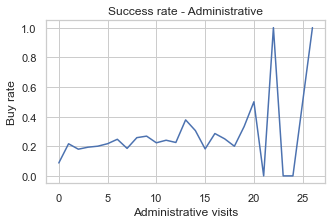

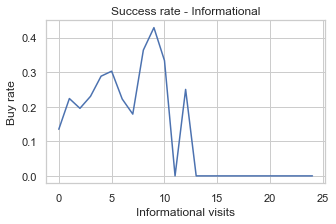

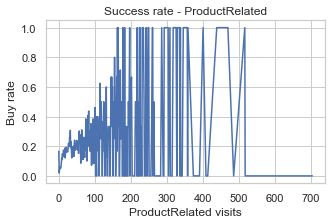

In [44]:
for c in ['Administrative', 'Informational', 'ProductRelated']:
    plt.figure(figsize=(5,3))
    plt.plot(df_train.groupby(f'{c}').Revenue.mean())
    plt.title(f'Success rate - {c}')
    plt.xlabel(f'{c} visits')
    plt.ylabel('Buy rate')
    plt.show()

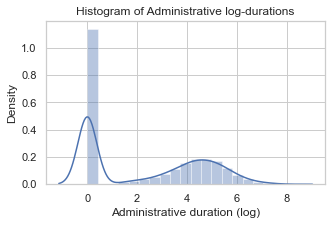

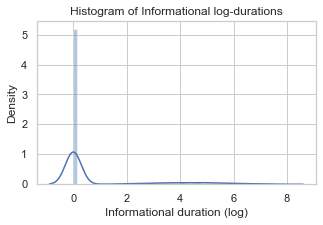

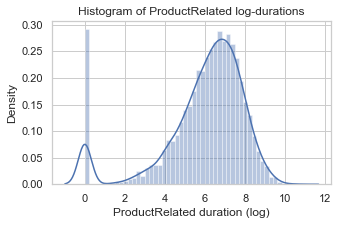

In [45]:
for c in ['Administrative', 'Informational', 'ProductRelated']:
    plt.figure(figsize=(5,3))
    sns.distplot(np.log1p(df_train[f'{c}_Duration']))
    plt.title(f'Histogram of {c} log-durations')
    plt.xlabel(f'{c} duration (log)')
    plt.ylabel('Density')
    plt.show()

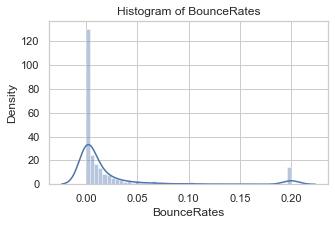

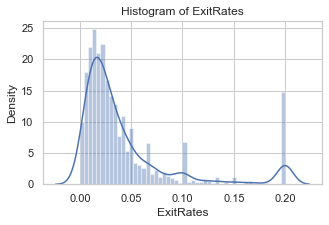

In [46]:
for c in ['BounceRates', 'ExitRates']:
    plt.figure(figsize=(5,3))
    sns.distplot(df_train[f'{c}'])
    plt.title(f'Histogram of {c}')
    plt.xlabel(f'{c}')
    plt.ylabel('Density')
    plt.show()

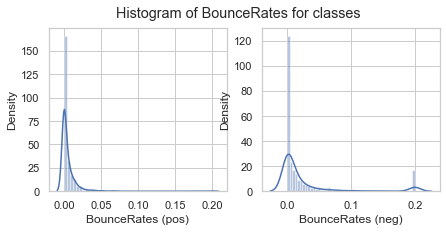

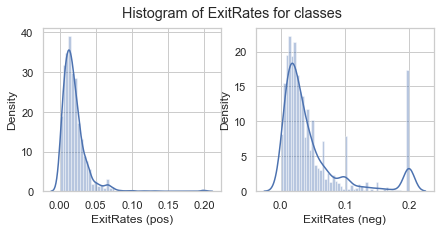

In [47]:
for c in ['BounceRates', 'ExitRates']:
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(7, 3)
    sns.distplot(df_train[df_train.Revenue][f'{c}'], ax=ax[0])
    sns.distplot(df_train[~df_train.Revenue][f'{c}'], ax=ax[1])
    plt.suptitle(f'Histogram of {c} for classes')
    ax[0].set_xlabel(f'{c} (pos)')
    ax[1].set_xlabel(f'{c} (neg)')
    ax[0].set_ylabel('Density')
    plt.show()

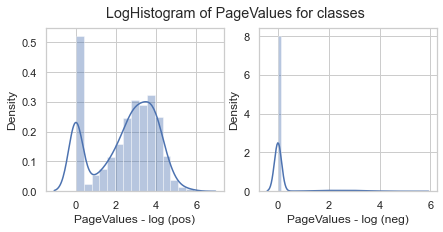

In [48]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(7, 3)
sns.distplot(np.log1p(df_train[df_train.Revenue]['PageValues']), ax=ax[0])
sns.distplot(np.log1p(df_train[~df_train.Revenue]['PageValues']), ax=ax[1])
plt.suptitle(f'LogHistogram of PageValues for classes')
ax[0].set_xlabel('PageValues - log (pos)')
ax[1].set_xlabel(f'PageValues - log (neg)')
ax[0].set_ylabel('Density')
plt.show()

0.0    8324
0.6     267
0.8     243
0.4     177
0.2     121
1.0     115
Name: SpecialDay, dtype: int64


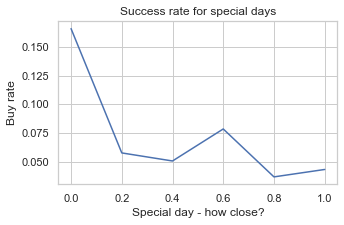

In [49]:
print(df_train.SpecialDay.value_counts())

plt.figure(figsize=(5,3))
plt.plot(df_train.groupby('SpecialDay').Revenue.mean())
plt.title(f'Success rate for special days')
plt.xlabel(f'Special day - how close?')
plt.ylabel('Buy rate')
plt.show()

May     2476
Nov     2316
Mar     1427
Dec     1287
Oct      411
Aug      340
Jul      330
Sep      317
June     217
Feb      126
Name: Month, dtype: int64


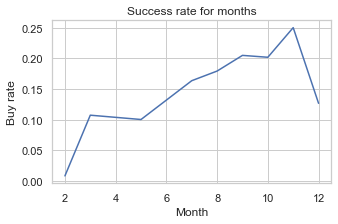

In [50]:
import calendar
d = dict((v,k) for k,v in enumerate(calendar.month_abbr))
print(df_train.Month.value_counts())

plt.figure(figsize=(5,3))
plt.plot(df_train.groupby(df_train.Month.map(d)).Revenue.mean())
plt.title(f'Success rate for months')
plt.xlabel(f'Month')
plt.ylabel('Buy rate')
plt.show()

2    4946
1    1937
3    1933
4     349
8      56
6      15
7       6
5       5
Name: OperatingSystems, dtype: int64


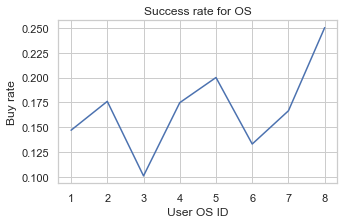

In [51]:
print(df_train.OperatingSystems.value_counts())

plt.figure(figsize=(5,3))
plt.plot(df_train.groupby('OperatingSystems').Revenue.mean())
plt.title(f'Success rate for OS')
plt.xlabel(f'User OS ID')
plt.ylabel('Buy rate')
plt.show()

2     6015
1     1831
4      549
5      345
6      123
10     115
8      100
3       77
13      45
7       36
12       5
11       5
9        1
Name: Browser, dtype: int64


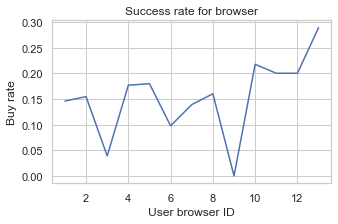

In [52]:
print(df_train.Browser.value_counts())

plt.figure(figsize=(5,3))
plt.plot(df_train.groupby('Browser').Revenue.mean())
plt.title(f'Success rate for browser')
plt.xlabel(f'User browser ID')
plt.ylabel('Buy rate')
plt.show()

1    3567
3    1816
4     889
2     840
6     607
7     590
9     376
8     333
5     229
Name: Region, dtype: int64


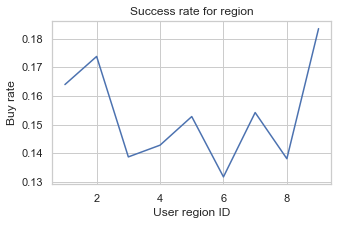

In [53]:
print(df_train.Region.value_counts())

plt.figure(figsize=(5,3))
plt.plot(df_train.groupby('Region').Revenue.mean())
plt.title(f'Success rate for region')
plt.xlabel(f'User region ID')
plt.ylabel('Buy rate')
plt.show()

2     2965
1     1868
3     1499
4      792
13     562
10     331
6      328
8      250
11     192
5      187
20     142
9       35
15      29
7       27
19      14
14      13
18       9
16       2
12       1
17       1
Name: TrafficType, dtype: int64


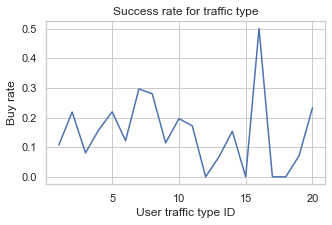

In [54]:
print(df_train.TrafficType.value_counts())

plt.figure(figsize=(5,3))
plt.plot(df_train.groupby('TrafficType').Revenue.mean())
plt.title(f'Success rate for traffic type')
plt.xlabel(f'User traffic type ID')
plt.ylabel('Buy rate')
plt.show()

In [55]:
print(df_train.groupby('Weekend').Revenue.mean())
print('-'*10)
print(df_train.Weekend.value_counts())

Weekend
False    0.149979
True     0.170360
Name: Revenue, dtype: float64
----------
False    7081
True     2166
Name: Weekend, dtype: int64


Строим модель

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import average_precision_score

In [57]:
for c in ['Administrative', 'Informational', 'ProductRelated', 'PageValues']:
    df_train[c] = np.log1p(df_train[c])
    df_val[c] = np.log1p(df_val[c])

In [58]:
X_train = df_train.drop(columns=['Revenue'])
y_train = df_train.Revenue

X_val = df_val.drop(columns=['Revenue'])
y_val = df_val.Revenue



In [59]:
categorical = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
numerical = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
             'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
ct = ColumnTransformer([
    ('scaling', StandardScaler(), numerical),
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
], remainder='passthrough')

pipe = Pipeline(steps=[
    ('transform', ct),
    ('logreg', LogisticRegression(C=0.1))
])

model = pipe.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
average_precision_score(y_val, y_pred)

0.6925001289856882

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
ct = ColumnTransformer([
    ('scaling', StandardScaler(), numerical),
    ('ohe', OrdinalEncoder(), categorical),
], remainder='passthrough')

pipe = Pipeline(steps=[
    ('transform', ct),
    ('rf', RandomForestClassifier(n_estimators=1000, criterion='entropy', n_jobs=4))
])

model = pipe.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
average_precision_score(y_val, y_pred)

0.766083520675392

Text(0.5, 1.0, 'RF Feature Importances')

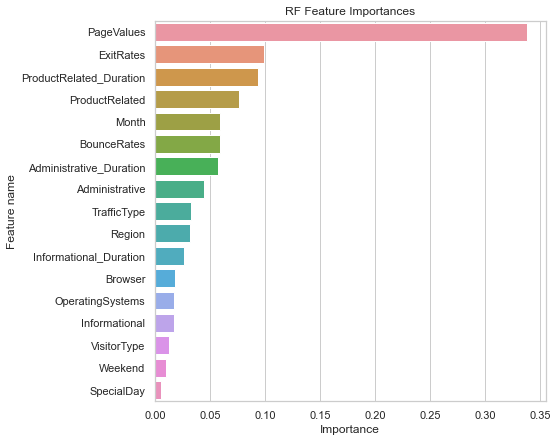

In [62]:
plt.figure(figsize=(7,7))
fv = sorted(list(zip(X_train.columns, model.steps[1][1].feature_importances_)), key=lambda x: x[1], reverse=True)
sns.barplot(y=[i[0] for i in fv], x=[i[1] for i in fv])
plt.xlabel('Importance')
plt.ylabel('Feature name')
plt.title('RF Feature Importances')

In [63]:
X_train_old = X_train[X_train.VisitorType == 'Returning_Visitor']
y_train_old = y_train[X_train.VisitorType == 'Returning_Visitor']
X_val_old = X_val[X_val.VisitorType == 'Returning_Visitor']
y_val_old = y_val[X_val.VisitorType == 'Returning_Visitor']

X_train_new = X_train[X_train.VisitorType != 'Returning_Visitor']
y_train_new = y_train[X_train.VisitorType != 'Returning_Visitor']
X_val_new = X_val[X_val.VisitorType != 'Returning_Visitor']
y_val_new = y_val[X_val.VisitorType != 'Returning_Visitor']

In [64]:
#old
ct = ColumnTransformer([
    ('scaling', StandardScaler(), numerical),
    ('ohe', OrdinalEncoder(), categorical),
], remainder='passthrough')

pipe = Pipeline(steps=[
    ('transform', ct),
    ('rf', RandomForestClassifier(n_estimators=1000, criterion='entropy', n_jobs=4))
])

model = pipe.fit(X_train_old, y_train_old)
y_pred_old = model.predict_proba(X_val_old)[:, 1]
average_precision_score(y_val_old, y_pred_old)

0.7210348313153223

Text(0.5, 1.0, 'RF Feature Importances - old users')

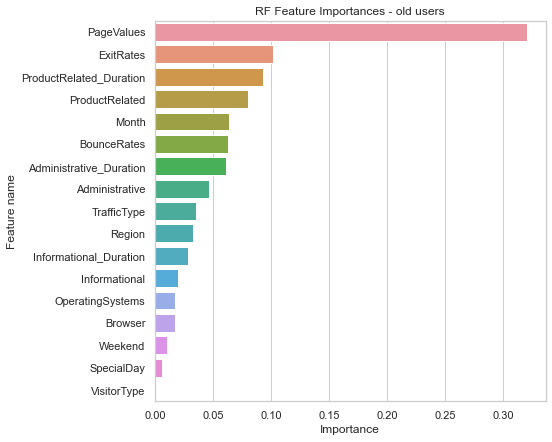

In [65]:
plt.figure(figsize=(7,7))
fv = sorted(list(zip(X_train_old.columns, model.steps[1][1].feature_importances_)), key=lambda x: x[1], reverse=True)
sns.barplot(y=[i[0] for i in fv], x=[i[1] for i in fv])
plt.xlabel('Importance')
plt.ylabel('Feature name')
plt.title('RF Feature Importances - old users')

In [66]:
#new
ct = ColumnTransformer([
    ('scaling', StandardScaler(), numerical),
    ('ohe', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical),
], remainder='passthrough')

pipe = Pipeline(steps=[
    ('transform', ct),
    ('rf', RandomForestClassifier(n_estimators=1000, criterion='entropy', n_jobs=4))
])

model = pipe.fit(X_train_new, y_train_new)
y_pred_new = model.predict_proba(X_val_new)[:, 1]
average_precision_score(y_val_new, y_pred_new)

0.8539902693328804

Text(0.5, 1.0, 'RF Feature Importances - new users')

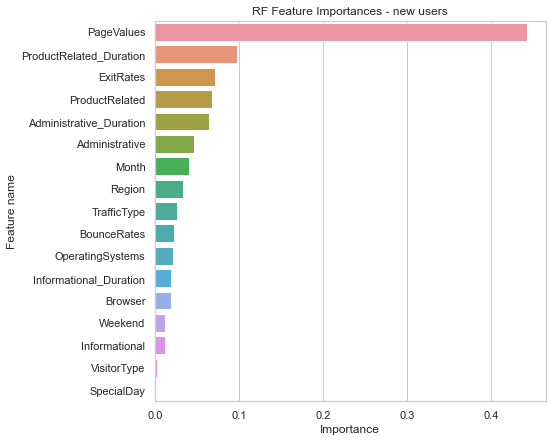

In [67]:
plt.figure(figsize=(7,7))
fv = sorted(list(zip(X_train_new.columns, model.steps[1][1].feature_importances_)), key=lambda x: x[1], reverse=True)
sns.barplot(y=[i[0] for i in fv], x=[i[1] for i in fv])
plt.xlabel('Importance')
plt.ylabel('Feature name')
plt.title('RF Feature Importances - new users')